In [1]:
from google.colab import files

# Upload your CSV
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


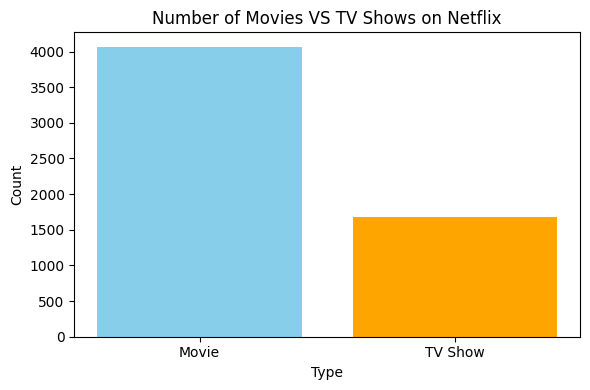

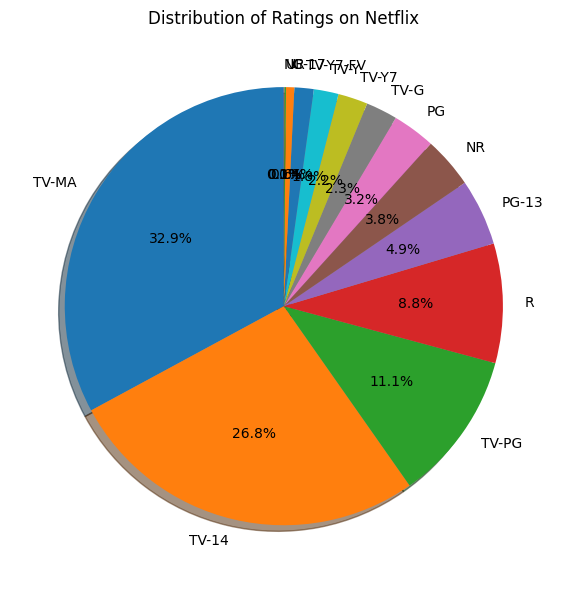

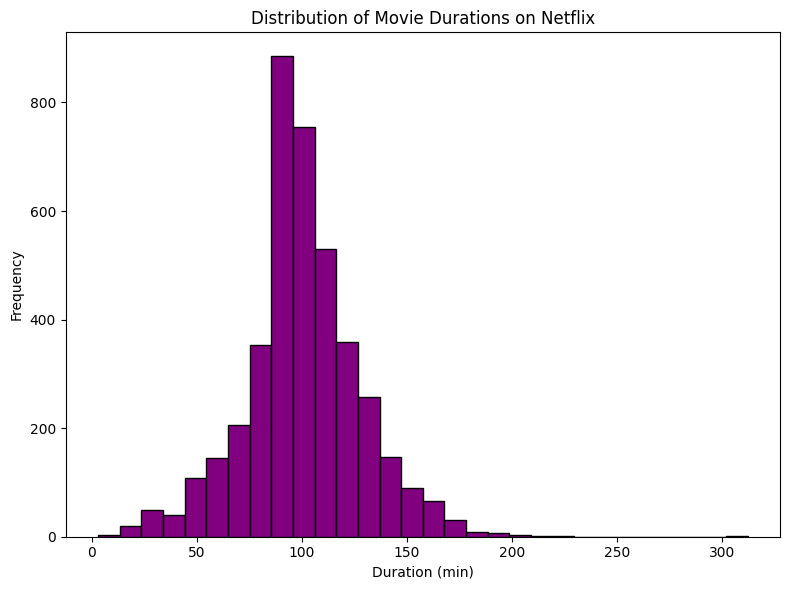

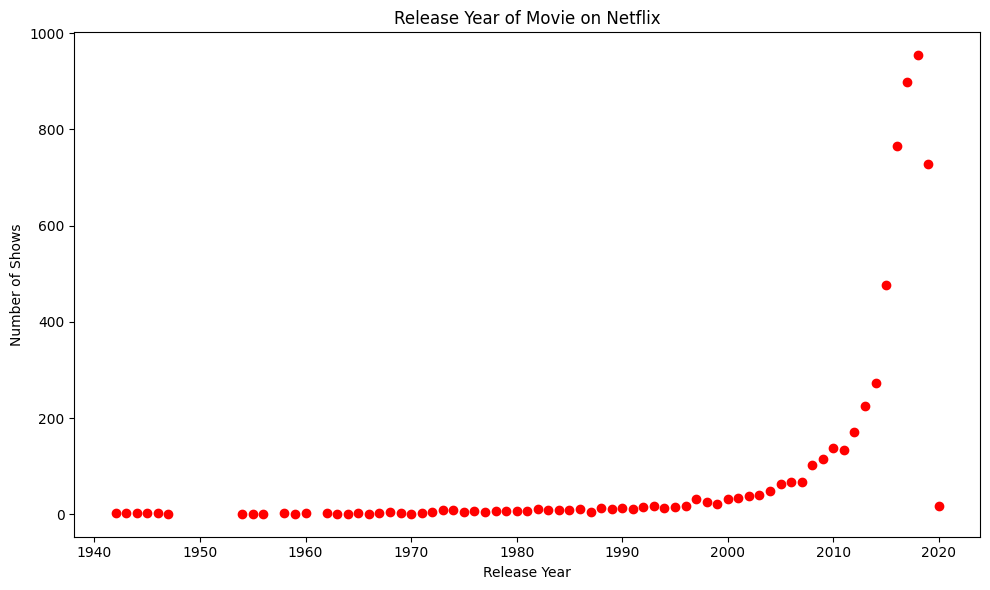

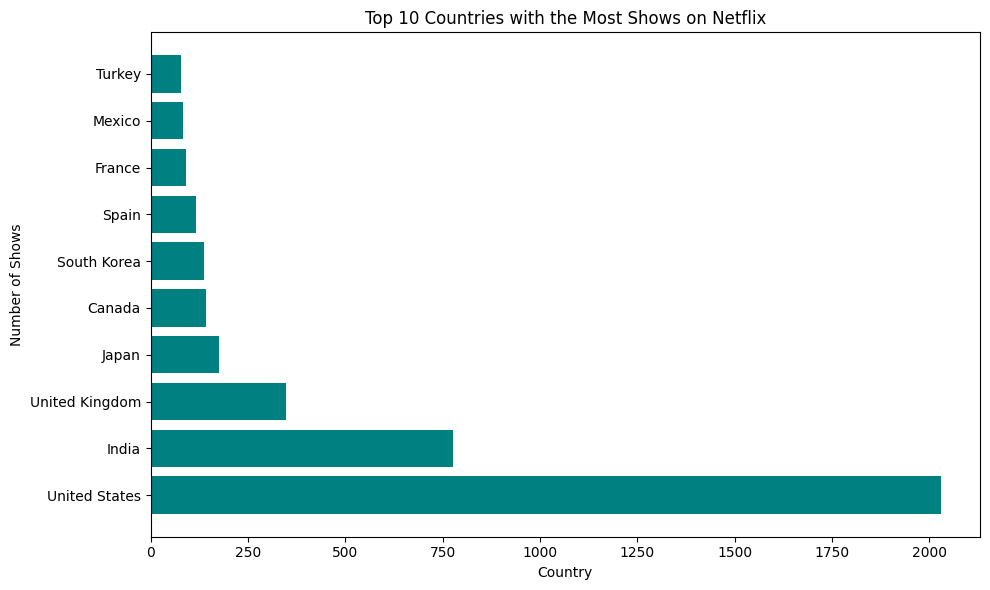

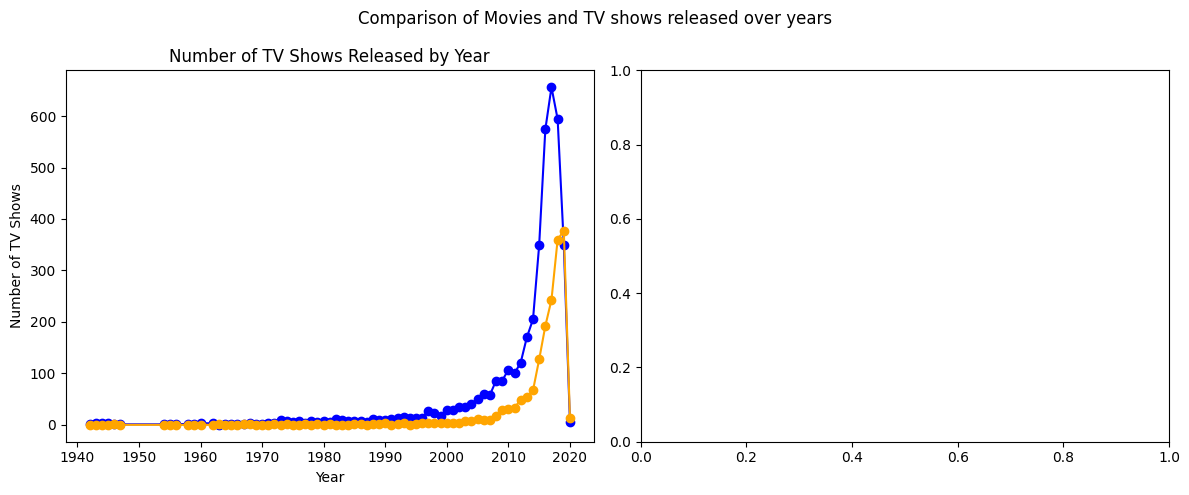

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#load data
df = pd.read_csv('netflix_titles.csv')

#clean data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

# Compare number of Movies and TV Shows on Netflix
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=('skyblue','orange'))
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of Movies VS TV Shows on Netflix')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

# Showing how content is rated
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, shadow= True)
plt.title('Distribution of Ratings on Netflix')
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()

# Histogram of movie durations in minutes

movie_df = df[df['type'] == 'Movie'].copy()
movie_df = df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df, bins=30, color='purple', edgecolor='black')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations on Netflix')
plt.tight_layout()
plt.savefig('movie_distribution_hist.png')
plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Release Year of Movie on Netflix')
plt.tight_layout()
plt.savefig('release_year.png')
plt.show()

#Top 10 Countries Producing Netflix Content -Horizontal bar chart of countries with most shows

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Top 10 Countries with the Most Shows on Netflix')
plt.tight_layout()
plt.savefig('top_countries.png')
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2,figsize=(12,5))

#first subplot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], marker='o', linestyle='-', color='blue')
ax[0].set_title('Number of Movies Released by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot: tvshows
ax[0].plot(content_by_year.index, content_by_year['TV Show'], marker='o', linestyle='-', color='orange')
ax[0].set_title('Number of TV Shows Released by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV shows released over years')
plt.tight_layout()
plt.savefig('content_by_year.png')
plt.show()